### pip 설치
+ pip install nltk
+ pip install konlpy
    - import konlpy 시 오류 attributeerror: module 'tweepy' has no attribute 'streamlistener'
    - tweepy 버전이 3.x.x 이어야 함.
    - pip install tweepy==3.10.0
+ pip install jpype1 Jpype1-py3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('naverview.csv', encoding='UTF-8')

In [6]:
df.head()

,id,document,label
0,0,너무 예쁘고 반짝거리는 놀이공원의 설레임 합리적인 가격 편한 주차 모든 것이 완벽...,1
1,1,초 초 너무 좋아했어요 에버랜드보다 더 좋대요 부르미즈동산이 제일 좋았다네요 범퍼카...,1
2,2,티켓저렴하게 구매했네요 좋아요 사진이 잘 나와요,1
3,3,가족 하루종일 합리적인 가격으로 잘 놀다갑니다아이들이 또 오고싶다고 그러네여 내년에...,1
4,4,저렴한가격에 잘 놀다가요 아이들이 엄청 좋아하네요주차하기 편해요,1


In [7]:
# 데이터 셋 확인
df.columns = ['date','text','rating']

In [8]:
# 결측치 값 처리하기
df.isnull().sum()

date      0
text      0
rating    0
dtype: int64

In [9]:
df = df[df['text'].notnull()]
df = df[df['rating'].notnull()]

In [10]:
# 결측치 값 처리하기
df.isnull().sum()

date      0
text      0
rating    0
dtype: int64

In [11]:
# 데이터 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    201 non-null    int64 
 1   text    201 non-null    object
 2   rating  201 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.3+ KB


In [12]:
# 데이터 변수 확인
df['text']

0      너무 예쁘고 반짝거리는 놀이공원의 설레임  합리적인 가격 편한 주차 모든 것이 완벽...
1      초 초 너무 좋아했어요 에버랜드보다 더 좋대요 부르미즈동산이 제일 좋았다네요 범퍼카...
2                            티켓저렴하게 구매했네요  좋아요 사진이 잘 나와요
3      가족 하루종일 합리적인 가격으로 잘 놀다갑니다아이들이 또 오고싶다고 그러네여 내년에...
4                    저렴한가격에 잘 놀다가요 아이들이 엄청 좋아하네요주차하기 편해요
                             ...                        
196                 가까워서 다녀왔는데 관리가 잘 안되고 있는 느낌이에요최근 방문일일
197    관리를 너무 안해서 대체적으로 많이 노후하고 깨끗한 상태가 아닙니다 날씨때문에 운휴...
198    눈썰매타러 갔어요 번쯤타니 애가 힘들어해서 옆에 있는 빙어낚시하는 곳에 갔는데 죽은...
199    아주 이쁘지만 애들관리가 안되다보니 좀 정신없네요 부모들도 손 놓은 애들이 애미애비...
200    년만의 방문인데 거의 대부분 그대로다라구여 잘 놀다오긴 했는데 시설들이 많이 낡았네...
Name: text, Length: 201, dtype: object

In [13]:
df['text'][100]

'합리적인 가격에 아이들이 탈 놀이기구가 많아서 키 이상의 어린아이를 둔 가정에 추천합니다가격이 합리적이에요최근 방문일일번째 방문예약'

In [14]:
# 정규 표현식 함수 정의
import re

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [15]:
# 기존 데이터
df['text'][0]

'너무 예쁘고 반짝거리는 놀이공원의 설레임  합리적인 가격 편한 주차 모든 것이 완벽했어요 조만간 눈썰매 타러 또 갈거에요ㅎ볼거리가 많아요'

In [16]:
# 정규식 표현 적용 후 데이터
apply_regular_expression(df['text'][0])

'너무 예쁘고 반짝거리는 놀이공원의 설레임  합리적인 가격 편한 주차 모든 것이 완벽했어요 조만간 눈썰매 타러 또 갈거에요ㅎ볼거리가 많아요'

In [17]:
# 한국어 행태소 명사 단위 
from konlpy.tag import Okt
from collections import Counter

In [18]:
apply_regular_expression(df['text'][0])

'너무 예쁘고 반짝거리는 놀이공원의 설레임  합리적인 가격 편한 주차 모든 것이 완벽했어요 조만간 눈썰매 타러 또 갈거에요ㅎ볼거리가 많아요'

In [19]:
okt = Okt()  # 명사 형태소 추출 함}수
nouns = okt.nouns(apply_regular_expression(df['text'][0]))
nouns

['놀이', '공원', '설레임', '합리', '가격', '주차', '모든', '것', '조만간', '눈썰매', '또', '볼거리']

In [20]:
# 말뭉치 생성
#dft = df.iloc[:,1].tolist()
#sdft = str(dft)
corpus = "".join(df['text'].tolist())
corpus

'너무 예쁘고 반짝거리는 놀이공원의 설레임  합리적인 가격 편한 주차 모든 것이 완벽했어요 조만간 눈썰매 타러 또 갈거에요ㅎ볼거리가 많아요초 초 너무 좋아했어요 에버랜드보다 더 좋대요 부르미즈동산이 제일 좋았다네요 범퍼카도 엄청 탔구요 저학년 아이들이 이용할만한 놀이기구가 많아요 만족합니다 그리고 한식종류가 많고 가격도 저렴해요놀이기구가 다양해요티켓저렴하게 구매했네요  좋아요 사진이 잘 나와요가족 하루종일 합리적인 가격으로 잘 놀다갑니다아이들이 또 오고싶다고 그러네여 내년에 재방문 할께용놀이기구가 다양해요저렴한가격에 잘 놀다가요 아이들이 엄청 좋아하네요주차하기 편해요네이버 통해 특가로저렴하게아이들과잘즐기고왔어요 놀이기구도다양하고볼거리즐길거리다양해요 코로나로지친일상에모처럼신나는하루였어요가격이 합리적이에요영수증행사중이라저렴하게 다녀왔어요놀이기구가 다양해요합리적인 가격에 아이들이 탈 놀이기구가 많아서 키 이상의 어린아이를 둔 가정에 추천합니다가격이 합리적이에요날씨도 좋았고 가족과 함께 기분좋게 놀다 갑니다 프로모션으로 저렴하게 티켓 구매했어요 역시 서울랜드는 아침 일찍 가는게 진리합리적인 가격에 너무나 즐거운 시간 포토존이 많아 굿굿가격이 합리적이에요카드 행사로 잘 다녀왔어요 아이들과 부모 합리적 가격으로 놀이기구부터 여러시설 잘 이용하고 왔어요가격이 합리적이에요저렴하게 구입해서 재밌게 놀다가요주차하기 편해요년만에 가본 서울랜드는 변함이 별로 없네요 장단점이 있습니다 먹거리도 적당한 가격에 적당한 맛 놀이기구들은 예전에 재미있게 타던것들이 역시 인기가 많고 스릴넘치네요 밤 시 폐장시간까지 풀로 놀아서 완전 녹초가 될 정도 였어요 아이들도 참 즐거워했고요 밤 시 분쯤 주차요금 정산에서 다둥이 할인을 받을려는데 담당자가 주무시는건지 없는건지 할인 미적용요금 다 내고와서 좀 아쉽습니다체험 프로그램이 다양해요가격대비 잘 놀다 왔어요볼거리가 많아요저렴하게 잘 다녀왔어요 토요일 저녁에도 사람 많더라구요주차하기 편해요가격대비 정말 재미있게 놀고 왔습니다 아이 둘 데리고 동물원에

In [21]:
# 정규 표현식 적용
apply_regular_expression(corpus)

'너무 예쁘고 반짝거리는 놀이공원의 설레임  합리적인 가격 편한 주차 모든 것이 완벽했어요 조만간 눈썰매 타러 또 갈거에요ㅎ볼거리가 많아요초 초 너무 좋아했어요 에버랜드보다 더 좋대요 부르미즈동산이 제일 좋았다네요 범퍼카도 엄청 탔구요 저학년 아이들이 이용할만한 놀이기구가 많아요 만족합니다 그리고 한식종류가 많고 가격도 저렴해요놀이기구가 다양해요티켓저렴하게 구매했네요  좋아요 사진이 잘 나와요가족 하루종일 합리적인 가격으로 잘 놀다갑니다아이들이 또 오고싶다고 그러네여 내년에 재방문 할께용놀이기구가 다양해요저렴한가격에 잘 놀다가요 아이들이 엄청 좋아하네요주차하기 편해요네이버 통해 특가로저렴하게아이들과잘즐기고왔어요 놀이기구도다양하고볼거리즐길거리다양해요 코로나로지친일상에모처럼신나는하루였어요가격이 합리적이에요영수증행사중이라저렴하게 다녀왔어요놀이기구가 다양해요합리적인 가격에 아이들이 탈 놀이기구가 많아서 키 이상의 어린아이를 둔 가정에 추천합니다가격이 합리적이에요날씨도 좋았고 가족과 함께 기분좋게 놀다 갑니다 프로모션으로 저렴하게 티켓 구매했어요 역시 서울랜드는 아침 일찍 가는게 진리합리적인 가격에 너무나 즐거운 시간 포토존이 많아 굿굿가격이 합리적이에요카드 행사로 잘 다녀왔어요 아이들과 부모 합리적 가격으로 놀이기구부터 여러시설 잘 이용하고 왔어요가격이 합리적이에요저렴하게 구입해서 재밌게 놀다가요주차하기 편해요년만에 가본 서울랜드는 변함이 별로 없네요 장단점이 있습니다 먹거리도 적당한 가격에 적당한 맛 놀이기구들은 예전에 재미있게 타던것들이 역시 인기가 많고 스릴넘치네요 밤 시 폐장시간까지 풀로 놀아서 완전 녹초가 될 정도 였어요 아이들도 참 즐거워했고요 밤 시 분쯤 주차요금 정산에서 다둥이 할인을 받을려는데 담당자가 주무시는건지 없는건지 할인 미적용요금 다 내고와서 좀 아쉽습니다체험 프로그램이 다양해요가격대비 잘 놀다 왔어요볼거리가 많아요저렴하게 잘 다녀왔어요 토요일 저녁에도 사람 많더라구요주차하기 편해요가격대비 정말 재미있게 놀고 왔습니다 아이 둘 데리고 동물원에

In [22]:
# 전체 말뭉치(corpus)에서 명사 형태소 추출
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

['놀이', '공원', '설레임', '합리', '가격', '주차', '모든', '것', '조만간', '눈썰매', '또', '볼거리', '초', '초', '에버랜드', '더', '대요', '미즈', '산이', '제일', '범퍼카', '저학년', '아이', '이용', '놀이기구', '한식', '종류', '가격', '놀이기구', '티켓', '구매', '사진', '가족', '하루', '종일', '합리', '가격', '아이', '또', '여', '내년', '재', '방문', '놀이기구', '가격', '아이', '주차', '네이버', '통해', '특', '가로', '아이', '놀이기구', '볼거리', '양해', '코로나', '로지', '친일', '모처럼', '하루', '가격', '합리', '영수증', '행사', '놀이기구', '합리', '가격', '아이', '탈', '놀이기구', '키', '이상', '가정', '추천', '가격', '합리', '날씨', '가족', '기분', '프로모션', '티켓', '구매', '역시', '랜드', '아침', '일찍', '진리', '합리', '가격', '시간', '포토', '존', '굿굿', '가격', '합리', '카드', '행사', '아이', '부모', '합리', '가격', '놀이기구', '시설', '이용', '가격', '합리', '구입', '주차', '년', '랜드', '별로', '장단점', '먹거리', '가격', '맛', '놀이기구', '예전', '역시', '인기', '스릴', '밤', '시', '폐장', '시간', '풀', '완전', '녹초', '정도', '아이', '밤', '시', '분', '주차', '요금', '정산', '둥이', '할인', '담당자', '할인', '미적', '용', '요금', '좀', '체험', '프로그램', '가격', '대비', '볼거리', '토요일', '저녁', '사람', '주차', '가격', '대비', '정말', '아이', '둘', '데리', '동물원', '랜드', '처음', '표', '곳', '할인', '

In [23]:
# 빈도 탐색
counter = Counter(nouns)

In [24]:
counter.most_common(10)

[('방문', 194),
 ('최근', 122),
 ('아이', 89),
 ('놀이기구', 84),
 ('가격', 74),
 ('사람', 70),
 ('합리', 42),
 ('주차', 35),
 ('볼거리', 35),
 ('시간', 31)]

In [25]:
# 한 글자 명사 제거
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

[('방문', 194),
 ('최근', 122),
 ('아이', 89),
 ('놀이기구', 84),
 ('가격', 74),
 ('사람', 70),
 ('합리', 42),
 ('주차', 35),
 ('볼거리', 35),
 ('시간', 31)]

In [26]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
df1 = TfidfVectorizer(decode_error='replace', encoding='utf-8')
dfx = df1.fit_transform(df.iloc[:,1].values.astype('U'))
dfx

<201x1701 sparse matrix of type '<class 'numpy.float64'>'
	with 3023 stored elements in Compressed Sparse Row format>

In [29]:
# BoW 백터 생성
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df['text'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [30]:
# 단어리스트
word_list

['가게',
 '가격',
 '가기',
 '가까이',
 '가능',
 '가다가',
 '가드',
 '가라',
 '가로',
 '가면',
 '가성',
 '가세',
 '가야',
 '가요',
 '가운데',
 '가을',
 '가정',
 '가족',
 '간식',
 '갈래',
 '갈비탕',
 '갈수',
 '개선',
 '개월',
 '개장',
 '개판',
 '거리',
 '거의',
 '걱정',
 '걷기',
 '검색',
 '게임',
 '겨울',
 '결재',
 '결제',
 '계산',
 '계속',
 '계시',
 '고기',
 '고요',
 '고학년',
 '곳곳',
 '곳도',
 '공기',
 '공룡',
 '공연',
 '공원',
 '관리',
 '광탈',
 '구가',
 '구경',
 '구경만',
 '구도',
 '구려',
 '구매',
 '구역',
 '구입',
 '국물',
 '국민카드',
 '국수',
 '군데군데',
 '굳이',
 '굿굿',
 '규모',
 '그거',
 '그게',
 '그냥',
 '그닥',
 '그대로',
 '금방',
 '금액',
 '금요일',
 '기간',
 '기구',
 '기본',
 '기분',
 '기전',
 '기준',
 '나들이',
 '나름',
 '나은',
 '나이',
 '나중',
 '낙후',
 '낚시',
 '날씨',
 '남아',
 '남자',
 '내년',
 '내의',
 '널널',
 '네이버',
 '년전',
 '노멀',
 '노후',
 '녹초',
 '놀수',
 '놀이',
 '놀이기구',
 '놀이동산',
 '높이',
 '눈썰매',
 '눈치',
 '느낌',
 '느릿느릿',
 '느무',
 '는가',
 '다녓는데',
 '다른',
 '다만',
 '다시',
 '다양성',
 '다음',
 '다주',
 '다행',
 '단점',
 '단풍',
 '담당자',
 '답변',
 '당분간',
 '대감',
 '대기',
 '대박',
 '대부분',
 '대비',
 '대신',
 '대요',
 '대책',
 '대체',
 '대체로',
 '대학',
 '대한',
 '대해',
 '더니',
 '덕분',
 '데리',
 '데이트',
 '도시락',
 '도착

In [31]:
# 각 단어가 전체 리뷰중에 등장한 총 횟수
count_list

array([  3,  74,   7,   2,   1,   1,   1,   1,   2,   2,   6,   2,   1,
         1,   1,   2,   2,   5,   3,   1,   1,   1,   3,   2,   7,   1,
        13,   4,   1,   1,   1,   1,   1,   4,   2,   3,   3,   1,   1,
         1,   2,   1,   1,   1,   5,   9,   3,   8,   1,   1,   2,   1,
         1,   1,   5,   2,   3,   1,   3,   1,   1,   2,   2,   1,   1,
         1,   6,   1,   2,   1,   1,   7,   2,  11,   2,   4,   1,   1,
         2,   2,   1,   2,   2,   2,   1,   6,   1,   1,   1,   1,   4,
         5,   1,   2,   1,   1,   2,   4,  85,   4,   1,   3,   2,   4,
         1,   1,   1,   1,   6,   8,   2,   1,   5,   1,   1,   1,   3,
         1,   1,   1,   2,   7,   2,   4,   3,   1,   1,   1,   1,   3,
         1,   1,   1,   2,   2,   9,   2,   1,   1,   1,   5,   3,   1,
         2,   3,   1,   1,   1,   1,   1,   1,   4,   2,   1,   2,   1,
        12,   1,   2,   1,   2,   1,   2,   1,   8,   8,   2,   1,   2,
         4,   1,   2,   2,   2,   2,   1,  11,   1,   1,   3,   

In [32]:
# 각 단어의 리뷰별 등장 횟수
bow_vect.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [33]:
bow_vect.shape

(201, 542)

In [34]:
# "단어" - "총 등장 횟수" Matching
word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'가게': 3,
 '가격': 74,
 '가기': 7,
 '가까이': 2,
 '가능': 1,
 '가다가': 1,
 '가드': 1,
 '가라': 1,
 '가로': 2,
 '가면': 2,
 '가성': 6,
 '가세': 2,
 '가야': 1,
 '가요': 1,
 '가운데': 1,
 '가을': 2,
 '가정': 2,
 '가족': 5,
 '간식': 3,
 '갈래': 1,
 '갈비탕': 1,
 '갈수': 1,
 '개선': 3,
 '개월': 2,
 '개장': 7,
 '개판': 1,
 '거리': 13,
 '거의': 4,
 '걱정': 1,
 '걷기': 1,
 '검색': 1,
 '게임': 1,
 '겨울': 1,
 '결재': 4,
 '결제': 2,
 '계산': 3,
 '계속': 3,
 '계시': 1,
 '고기': 1,
 '고요': 1,
 '고학년': 2,
 '곳곳': 1,
 '곳도': 1,
 '공기': 1,
 '공룡': 5,
 '공연': 9,
 '공원': 3,
 '관리': 8,
 '광탈': 1,
 '구가': 1,
 '구경': 2,
 '구경만': 1,
 '구도': 1,
 '구려': 1,
 '구매': 5,
 '구역': 2,
 '구입': 3,
 '국물': 1,
 '국민카드': 3,
 '국수': 1,
 '군데군데': 1,
 '굳이': 2,
 '굿굿': 2,
 '규모': 1,
 '그거': 1,
 '그게': 1,
 '그냥': 6,
 '그닥': 1,
 '그대로': 2,
 '금방': 1,
 '금액': 1,
 '금요일': 7,
 '기간': 2,
 '기구': 11,
 '기본': 2,
 '기분': 4,
 '기전': 1,
 '기준': 1,
 '나들이': 2,
 '나름': 2,
 '나은': 1,
 '나이': 2,
 '나중': 2,
 '낙후': 2,
 '낚시': 1,
 '날씨': 6,
 '남아': 1,
 '남자': 1,
 '내년': 1,
 '내의': 1,
 '널널': 4,
 '네이버': 5,
 '년전': 1,
 '노멀': 2,
 '노후': 1,
 '녹초': 1,
 '놀수': 2,
 '놀이': 4,
 '놀

### TF-IDF 적용
+ TF-IDF 변환
    - Bag of Words 벡터에 대해서 TF-IDF변환 진행합니다.

In [35]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [36]:
print(tf_idf_vect.shape)

(201, 542)


### 변환 후 1001*3599 matrix가 출력됩니다. 
+ 여기서
    - 한 행(row)은 한 리뷰를 의미하고
    - 한 열(column)은 한 단어를 의미합니다.

In [37]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])

  (0, 525)	0.2010720503323538
  (0, 431)	0.2097638155441184
  (0, 421)	0.41436620219680564
  (0, 246)	0.41436620219680564
  (0, 212)	0.20749302985059745
  (0, 183)	0.34674879139750703
  (0, 101)	0.3632156055336338
  (0, 97)	0.34674879139750703
  (0, 46)	0.3632156055336338
  (0, 1)	0.15746909189849087


In [38]:
# 첫 번째 리뷰에서 모든 단어의 중요도 -- 0인 값까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 542)
[[0.         0.15746909 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.36321561 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.34674879 0.     

In [44]:
# 백터 단어 mapping
vect.vocabulary_

{'놀이': 97,
 '공원': 46,
 '설레임': 246,
 '합리': 525,
 '가격': 1,
 '주차': 431,
 '모든': 183,
 '조만간': 421,
 '눈썰매': 101,
 '볼거리': 212,
 '에버랜드': 305,
 '대요': 126,
 '미즈': 196,
 '산이': 235,
 '제일': 416,
 '범퍼카': 206,
 '저학년': 401,
 '아이': 280,
 '이용': 362,
 '놀이기구': 98,
 '한식': 520,
 '종류': 425,
 '티켓': 492,
 '구매': 54,
 '사진': 232,
 '가족': 17,
 '하루': 517,
 '종일': 426,
 '내년': 88,
 '방문': 204,
 '네이버': 91,
 '통해': 488,
 '가로': 8,
 '양해': 295,
 '코로나': 472,
 '로지': 160,
 '친일': 466,
 '모처럼': 185,
 '영수증': 315,
 '행사': 528,
 '이상': 359,
 '가정': 16,
 '추천': 460,
 '날씨': 85,
 '기분': 75,
 '프로모션': 512,
 '역시': 310,
 '랜드': 156,
 '아침': 284,
 '일찍': 377,
 '진리': 441,
 '시간': 259,
 '포토': 505,
 '굿굿': 62,
 '카드': 467,
 '부모': 214,
 '시설': 262,
 '구입': 56,
 '별로': 207,
 '장단점': 394,
 '먹거리': 176,
 '예전': 319,
 '인기': 370,
 '스릴': 257,
 '폐장': 504,
 '완전': 327,
 '녹초': 95,
 '정도': 410,
 '요금': 330,
 '정산': 412,
 '둥이': 146,
 '할인': 524,
 '담당자': 117,
 '미적': 195,
 '체험': 450,
 '프로그램': 511,
 '대비': 124,
 '토요일': 487,
 '저녁': 400,
 '사람': 228,
 '정말': 411,
 '데리': 135,
 '동물원': 141

In [45]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{97: '놀이', 46: '공원', 246: '설레임', 525: '합리', 1: '가격', 431: '주차', 183: '모든', 421: '조만간', 101: '눈썰매', 2...


### 데이터셋 생성
+ Label
+ 우리는 이용자의 리뷰를 “긍정” / “부정” 두가지 부류로 나누고자 합니다. 하지만 이러한 이용자의 감성을 대표할 수 있는 “평가 점수” 변수는 1 ~ 5의 value를 가지고 있습니다. 따라서 "평가 점수"변수 (rating: 1 ~ 5)를 이진 변수 (긍정: 1, 부정:0)으로 변환해야 합니다.

In [46]:
df.sample(10)

,date,text,rating
108,108,아이들이 놀거리가 많아서 좋아요일번째 방문,1
113,113,아이들 데리고 가기 좋네요 공연도 좋았고 먹거리도 많았어요 야간개장이 더 볼거리가 ...,1
166,166,어린이들이 놀기 정말 좋아요 탈것도 많고 놀거리도 많아요 특히 야간에 전구도 너무 ...,1
141,141,평일이라 그런가 대기시간 초컷이네요 골고루 잘태우고 애들 갑갑해 했던거 잘풀고 가는...,1
196,196,가까워서 다녀왔는데 관리가 잘 안되고 있는 느낌이에요최근 방문일일,0
41,41,가격대 합리적이고 평일 저녁이라 대기도 많이 없었어요체험 프로그램이 다양해요,1
65,65,주말이라 사람이 많았지만 루나패스 사용해서 아이랑 즐겁게 놀고왔어요 처음부터 알고 ...,1
193,193,금요일 저녁시에 갔어요 사람없고 널널해서 좋았네요 시설이나 놀이기구 다 세월에 흔적...,1
98,98,유아 아이가 가기 딱 좋아요볼거리가 많아요최근 방문일월번째,1
92,92,살아이 신니게 놀고왔습니다아이들 탈수있는 놀이기구가 많아서 좋았어요놀이기구가 다양해...,1


<AxesSubplot:>

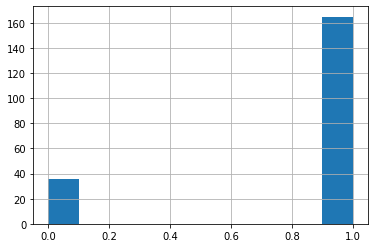

In [47]:
df['rating'].hist()

In [49]:
df["rating"].value_counts()

1    165
0     36
Name: rating, dtype: int64

### Training set / Test set 나누기

In [50]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = df['rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [51]:
x_train.shape, y_train.shape

((140, 542), (140,))

In [52]:
x_test.shape, y_test.shape

((61, 542), (61,))

### 4-3. 모델 학습
+ Logistic Regression 모델 학습

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

In [54]:
# 분류 결과 평가
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.79
precision: 0.79
recall: 1.00
F1: 0.88


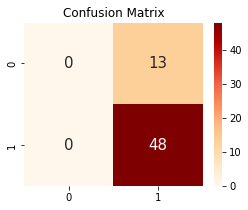

In [55]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [56]:
lr.coef_

array([[ 7.77293758e-02,  9.95724391e-01, -1.97927096e-01,
        -3.64254047e-01,  0.00000000e+00,  5.40922709e-02,
         0.00000000e+00, -1.74642185e-01,  6.30987688e-02,
         1.04215778e-01, -1.20116875e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  2.31822837e-02,
         5.44799511e-02,  6.51049035e-02,  1.55732896e-01,
         3.02702327e-02,  3.57589225e-02, -2.11348454e-01,
         5.40922709e-02, -3.44139596e-01,  4.53374132e-02,
         2.88826545e-02,  2.31822837e-02,  1.61017487e-01,
         9.49720609e-02,  0.00000000e+00,  9.12740379e-02,
         0.00000000e+00,  5.15257366e-02,  4.88660034e-02,
        -2.66557925e-01,  0.00000000e+00,  0.00000000e+00,
        -9.63062041e-02, -2.11348454e-01, -2.11348454e-01,
         6.08213846e-02,  0.00000000e+00, -2.04102895e-01,
         5.40922709e-02,  5.13101632e-02,  6.05404654e-02,
         3.39564912e-02,  1.28907906e-01, -7.33037130e-01,
         3.77444277e-02,  0.00000000e+00,  6.97537949e-0

<BarContainer object of 542 artists>

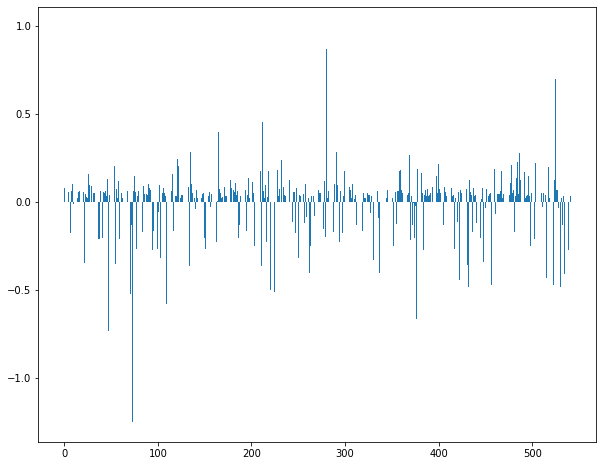

In [57]:
# print logistic regression's coef

plt.figure(figsize=(10, 8))
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])

In [58]:
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)[-5:])
# enumerate: 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환함

[(0.9957243908877984, 1), (0.8692834282071131, 280), (0.7882007405227754, 98), (0.6975220382616149, 525), (0.49950349957688467, 318)]
[(-0.5216880644170535, 71), (-0.5767322383216124, 109), (-0.667184781367101, 376), (-0.733037129920468, 47), (-1.24956549807828, 73)]


In [59]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = False)
coef_pos_index

[(0.9957243908877984, 1),
 (0.8692834282071131, 280),
 (0.7882007405227754, 98),
 (0.6975220382616149, 525),
 (0.49950349957688467, 318),
 (0.45314722854953315, 212),
 (0.39774288678200337, 165),
 (0.2864686524148052, 291),
 (0.28616456848897387, 135),
 (0.27880159670228677, 486),
 (0.2655745485552113, 369),
 (0.25534934140813514, 411),
 (0.24544627428115726, 121),
 (0.2404955951348103, 232),
 (0.22828877758578658, 112),
 (0.22705984093915674, 484),
 (0.22634178345292233, 428),
 (0.2188873051936482, 503),
 (0.21305299848329198, 400),
 (0.2126656549911462, 478),
 (0.2058536783721982, 54),
 (0.20375503115704788, 315),
 (0.2021113326383868, 122),
 (0.20167693107239157, 517),
 (0.1897997444989578, 460),
 (0.1861433734102437, 99),
 (0.18515929655818014, 377),
 (0.18413578837203076, 228),
 (0.18399261498846134, 359),
 (0.17604867825192513, 358),
 (0.1760006595942337, 210),
 (0.17560632284026786, 299),
 (0.17433046521301207, 467),
 (0.17392145586839156, 218),
 (0.173271625801823, 492),
 (0.16

In [60]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer

{97: '놀이',
 46: '공원',
 246: '설레임',
 525: '합리',
 1: '가격',
 431: '주차',
 183: '모든',
 421: '조만간',
 101: '눈썰매',
 212: '볼거리',
 305: '에버랜드',
 126: '대요',
 196: '미즈',
 235: '산이',
 416: '제일',
 206: '범퍼카',
 401: '저학년',
 280: '아이',
 362: '이용',
 98: '놀이기구',
 520: '한식',
 425: '종류',
 492: '티켓',
 54: '구매',
 232: '사진',
 17: '가족',
 517: '하루',
 426: '종일',
 88: '내년',
 204: '방문',
 91: '네이버',
 488: '통해',
 8: '가로',
 295: '양해',
 472: '코로나',
 160: '로지',
 466: '친일',
 185: '모처럼',
 315: '영수증',
 528: '행사',
 359: '이상',
 16: '가정',
 460: '추천',
 85: '날씨',
 75: '기분',
 512: '프로모션',
 310: '역시',
 156: '랜드',
 284: '아침',
 377: '일찍',
 441: '진리',
 259: '시간',
 505: '포토',
 62: '굿굿',
 467: '카드',
 214: '부모',
 262: '시설',
 56: '구입',
 207: '별로',
 394: '장단점',
 176: '먹거리',
 319: '예전',
 370: '인기',
 257: '스릴',
 504: '폐장',
 327: '완전',
 95: '녹초',
 410: '정도',
 330: '요금',
 412: '정산',
 146: '둥이',
 524: '할인',
 117: '담당자',
 195: '미적',
 450: '체험',
 511: '프로그램',
 124: '대비',
 487: '토요일',
 400: '저녁',
 228: '사람',
 411: '정말',
 135: '데리',
 141: '동물원'

In [68]:
for coef in coef_pos_index[:304]:
    print(invert_index_vectorizer[coef[1]], coef[0])

가격 0.9957243908877984
아이 0.8692834282071131
놀이기구 0.7882007405227754
합리 0.6975220382616149
예약 0.49950349957688467
볼거리 0.45314722854953315
리뷰 0.39774288678200337
야간 0.2864686524148052
데리 0.28616456848897387
토번 0.27880159670228677
이후 0.2655745485552113
정말 0.25534934140813514
대기 0.24544627428115726
사진 0.2404955951348103
다음 0.22828877758578658
탈수 0.22705984093915674
주말 0.22634178345292233
평일 0.2188873051936482
저녁 0.21305299848329198
타고 0.2126656549911462
구매 0.2058536783721982
영수증 0.20375503115704788
대박 0.2021113326383868
하루 0.20167693107239157
추천 0.1897997444989578
놀이동산 0.1861433734102437
일찍 0.18515929655818014
사람 0.18413578837203076
이상 0.18399261498846134
이벤트 0.17604867825192513
보기 0.1760006595942337
어린이 0.17560632284026786
카드 0.17433046521301207
불빛 0.17392145586839156
티켓 0.173271625801823
이용 0.16562073235232994
먹거리 0.16426185850443317
입장권 0.16260652148395308
거리 0.16101748732418641
단풍 0.16004515063654687
가족 0.15573289633845666
재밋 0.1469485321505492
기분 0.14683359531230616
패스 0.1466852357844

In [73]:
for coef in coef_neg_index[:124]:
    print(invert_index_vectorizer[coef[1]], coef[0])

기구 -1.24956549807828
관리 -0.733037129920468
일일 -0.667184781367101
다만 -0.5767322383216124
금요일 -0.5216880644170535
빙어 -0.5121535422048024
불편 -0.5003719858359417
주차장 -0.48067509753470883
형편 -0.4799013429234711
할로윈데이 -0.4736662772791239
최근 -0.47255869881708945
조명 -0.44291496634310806
하나 -0.43133600086317286
화장실 -0.40623581571563333
시설 -0.40311290022195706
운행 -0.4027405133905432
가까이 -0.36425404675024914
낙후 -0.36425404675024914
덕분 -0.36425404675024914
보완 -0.36425404675024914
별로 -0.35617634784962887
주차 -0.35496674724020016
구역 -0.34928436979292904
안내 -0.34928436979292904
개선 -0.34413959563081453
체적 -0.3384346096934872
요금 -0.33009110308739065
느낌 -0.3201453743192908
성인 -0.31730552850585825
노후 -0.27410498221353424
수유 -0.27410498221353424
자꾸 -0.27410498221353424
휴게실 -0.27410498221353424
정산 -0.27059101045500467
때문 -0.26748242216732543
결재 -0.2665579249165878
기준 -0.26442108718597757
높이 -0.26442108718597757
이유 -0.26442108718597757
제한 -0.26442108718597757
밤시 -0.24932151749343406
시작 -0.24932151749343406
음